# LMS Predictive Analytics – Big Data Analytics
Dieses Notebook simuliert ein System zur Vorhersage des akademischen Misserfolgsrisikos basierend auf synthetischen LMS-Daten, wie im Artikel von Fahd & Miah (2023) beschrieben.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  ConfusionMatrixDisplay

Daten laden aus dem Datei: LMS_Interaktionsdaten_230000.csv

In [80]:
df = pd.read_csv("LMS_Interaktionsdaten_230000.csv")
print(df.head())

  student_id  keystrokes  mouse_clicks  idle_time_minutes  sessions_per_week  \
0    S000001         294           523          15.070981                  2   
1    S000002         312           509          18.579225                  7   
2    S000003         280           483          25.973814                  7   
3    S000004         305           507          24.473236                  6   
4    S000005         319           469          13.135703                  8   

   exercise_completion_rate  result  
0                  0.995198       1  
1                  0.509736       1  
2                  0.682149       0  
3                  0.923218       1  
4                  0.535024       1  


Feature-Auswahl /  Vorbearbeitung von Daten & Skalierung

In [81]:
exclude_cols = ['result', 'student_id']  # Passe ggf. weitere nicht-numerische Spalten an

feature_names = [col for col in df.columns if col not in exclude_cols]

# Prétraitement des données
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['result'], test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Modelle & Training

In [76]:

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "MLP (Neural Net)": MLPClassifier(random_state=42, max_iter=300)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "model": model,
        "classification_report": classification_report(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }



c:\Users\Lenovo PC\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Lenovo PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Ausgabe der Ergebnisse

In [77]:

for name, res in results.items():
    print(f"\n{name}\n")
    print(res["classification_report"])


Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42841
           1       1.00      1.00      1.00     26159

    accuracy                           1.00     69000
   macro avg       1.00      1.00      1.00     69000
weighted avg       1.00      1.00      1.00     69000


Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42841
           1       1.00      1.00      1.00     26159

    accuracy                           1.00     69000
   macro avg       1.00      1.00      1.00     69000
weighted avg       1.00      1.00      1.00     69000


AdaBoost

              precision    recall  f1-score   support

           0       0.67      0.95      0.79     42841
           1       0.74      0.23      0.35     26159

    accuracy                           0.68     69000
   macro avg       0.70      0.59      0.57     69000
weighted avg       0.70      0.

Visualisierung

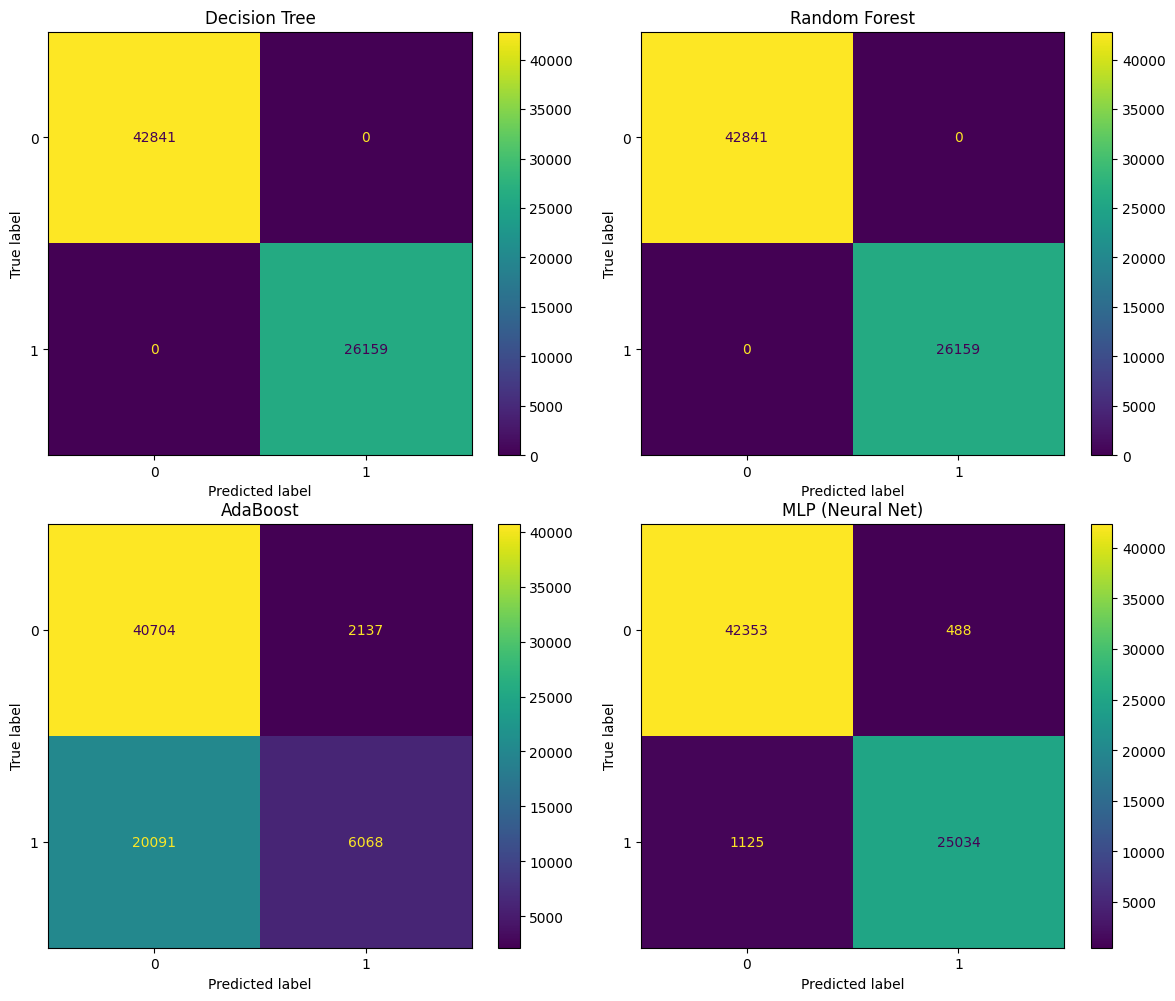

In [78]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, (name, res) in enumerate(results.items()):
    ConfusionMatrixDisplay(res["confusion_matrix"]).plot(ax=axs[i], values_format='d')
    axs[i].set_title(name)

plt.tight_layout()
plt.show()